In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
#cities

616

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yar-sale
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | burgeo
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | touros
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | chagda
City not found. Skipping...
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | kamaishi
Processing Record 11 of Set 1 | tateyama
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | perene
Processing Record 14 of Set 1 | hay river
Processing Record 15 of Set 1 | broken hill
Processing Record 16 of Set 1 | beringovskiy
Processing Record 17 of Set 1 | puerto ayacucho
Processing Record 18 of Set 1 | wembley
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | port keats
Processing Record 22 of Set 1 | arraial do cabo
Processin

Processing Record 36 of Set 4 | semirom
Processing Record 37 of Set 4 | norman wells
Processing Record 38 of Set 4 | ukholovo
Processing Record 39 of Set 4 | araripe
Processing Record 40 of Set 4 | biltine
Processing Record 41 of Set 4 | prince rupert
Processing Record 42 of Set 4 | ferme-neuve
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | athabasca
Processing Record 45 of Set 4 | arman
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | dingle
Processing Record 48 of Set 4 | cianorte
Processing Record 49 of Set 4 | uporovo
Processing Record 50 of Set 4 | alofi
Processing Record 1 of Set 5 | samarai
Processing Record 2 of Set 5 | salalah
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | boljoon
Processing Record 6 of Set 5 | bathsheba
Processing Record 7 of Set 5 | tevriz
Processing Record 8 of Set 5 | saint-pierre
Processing Record 9 of Set 5 | najran
Processing Record 10 of S

Processing Record 29 of Set 8 | asau
Processing Record 30 of Set 8 | achit
Processing Record 31 of Set 8 | arusha
Processing Record 32 of Set 8 | nan
Processing Record 33 of Set 8 | bairiki
Processing Record 34 of Set 8 | hihifo
City not found. Skipping...
Processing Record 35 of Set 8 | bambous virieux
Processing Record 36 of Set 8 | tuatapere
Processing Record 37 of Set 8 | tabou
Processing Record 38 of Set 8 | fairbanks
Processing Record 39 of Set 8 | sidrolandia
Processing Record 40 of Set 8 | halalo
City not found. Skipping...
Processing Record 41 of Set 8 | roros
Processing Record 42 of Set 8 | dossor
Processing Record 43 of Set 8 | vao
Processing Record 44 of Set 8 | huarmey
Processing Record 45 of Set 8 | palana
Processing Record 46 of Set 8 | islahiye
Processing Record 47 of Set 8 | maraa
Processing Record 48 of Set 8 | moindou
Processing Record 49 of Set 8 | clyde river
Processing Record 50 of Set 8 | vanavara
Processing Record 1 of Set 9 | ivanivka
Processing Record 2 of Set

Processing Record 15 of Set 12 | kruisfontein
Processing Record 16 of Set 12 | paraiso
Processing Record 17 of Set 12 | beauly
Processing Record 18 of Set 12 | road town
Processing Record 19 of Set 12 | kovdor
Processing Record 20 of Set 12 | barroso
Processing Record 21 of Set 12 | port-cartier
Processing Record 22 of Set 12 | gull lake
Processing Record 23 of Set 12 | hirara
Processing Record 24 of Set 12 | beni suef
Processing Record 25 of Set 12 | rorvik
Processing Record 26 of Set 12 | sangar
Processing Record 27 of Set 12 | camapua
Processing Record 28 of Set 12 | tambura
Processing Record 29 of Set 12 | karaul
City not found. Skipping...
Processing Record 30 of Set 12 | tautira
Processing Record 31 of Set 12 | gaspe
Processing Record 32 of Set 12 | ivanjica
Processing Record 33 of Set 12 | vuktyl
Processing Record 34 of Set 12 | ha tinh
Processing Record 35 of Set 12 | clemson
Processing Record 36 of Set 12 | san policarpo
Processing Record 37 of Set 12 | tura
Processing Record 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yar-Sale,66.8333,70.8333,-0.54,96,100,8.63,RU,2022-01-30 16:15:02
1,Bluff,-46.6000,168.3333,59.81,93,82,2.44,NZ,2022-01-30 16:09:27
2,Burgeo,47.6167,-57.6152,32.09,77,100,45.95,CA,2022-01-30 16:16:34
3,Hobart,-42.8794,147.3294,57.11,88,2,0.00,AU,2022-01-30 16:13:06
4,Touros,-5.1989,-35.4608,88.70,61,23,15.84,BR,2022-01-30 16:16:12
5,Rikitea,-23.1203,-134.9692,76.15,60,74,4.81,PF,2022-01-30 16:14:15
6,Jamestown,42.0970,-79.2353,16.52,47,72,5.99,US,2022-01-30 16:14:14
7,Tuktoyaktuk,69.4541,-133.0374,-2.20,78,100,16.11,CA,2022-01-30 16:16:35
8,Kamaishi,39.2667,141.8833,25.29,59,32,7.99,JP,2022-01-30 16:16:36
9,Tateyama,34.9833,139.8667,41.09,51,100,15.23,JP,2022-01-30 16:16:36


In [10]:
# Reorder the columns: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yar-Sale,RU,2022-01-30 16:15:02,66.8333,70.8333,-0.54,96,100,8.63
1,Bluff,NZ,2022-01-30 16:09:27,-46.6000,168.3333,59.81,93,82,2.44
2,Burgeo,CA,2022-01-30 16:16:34,47.6167,-57.6152,32.09,77,100,45.95
3,Hobart,AU,2022-01-30 16:13:06,-42.8794,147.3294,57.11,88,2,0.00
4,Touros,BR,2022-01-30 16:16:12,-5.1989,-35.4608,88.70,61,23,15.84
5,Rikitea,PF,2022-01-30 16:14:15,-23.1203,-134.9692,76.15,60,74,4.81
6,Jamestown,US,2022-01-30 16:14:14,42.0970,-79.2353,16.52,47,72,5.99
7,Tuktoyaktuk,CA,2022-01-30 16:16:35,69.4541,-133.0374,-2.20,78,100,16.11
8,Kamaishi,JP,2022-01-30 16:16:36,39.2667,141.8833,25.29,59,32,7.99
9,Tateyama,JP,2022-01-30 16:16:36,34.9833,139.8667,41.09,51,100,15.23


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

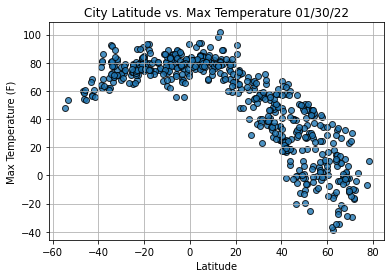

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

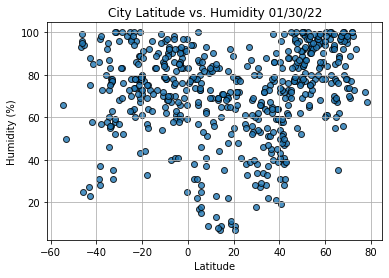

In [14]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

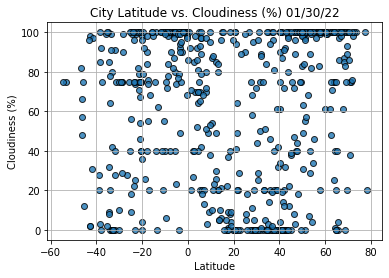

In [15]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

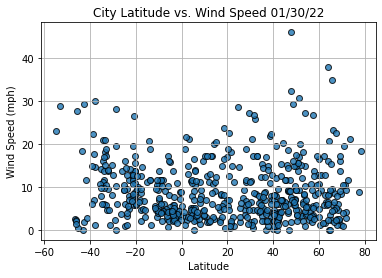

In [16]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
   
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                  Broken Hill
Country                        AU
Date          2022-01-30 16:16:37
Lat                        -31.95
Lng                      141.4333
Max Temp                    81.27
Humidity                       58
Cloudiness                     91
Wind Speed                   9.57
Name: 13, dtype: object

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

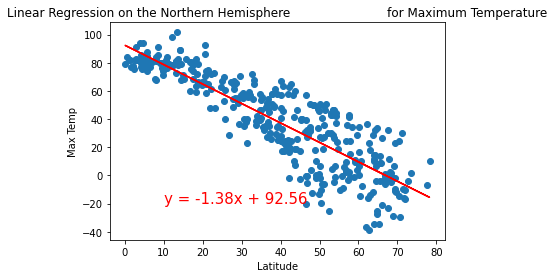

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-20))

In [30]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=-1.3829014295195572, intercept=92.55867975052243, rvalue=-0.8686610915133849, pvalue=6.519982638167682e-115, stderr=0.041001709758907406, intercept_stderr=1.7867563098002435)

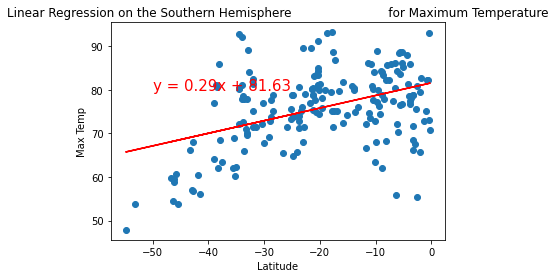

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

In [32]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.28965426841084885, intercept=81.63221686828565, rvalue=0.4319875458682032, pvalue=4.867286666812759e-10, stderr=0.04410403572300434, intercept_stderr=1.053199489690171)

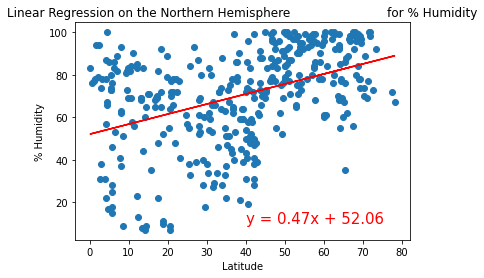

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [39]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.4713603190581092, intercept=52.05670189855487, rvalue=0.4235113048485976, pvalue=1.2692899075602117e-17, stderr=0.052415895204215114, intercept_stderr=2.2841591738650298)

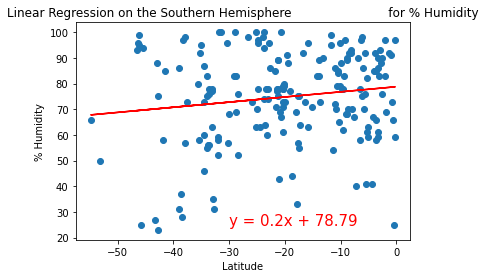

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-30,25))

In [41]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.20021040126588344, intercept=78.78586649176887, rvalue=0.14767783174140459, pvalue=0.0420193985994055, stderr=0.09779221719632292, intercept_stderr=2.3352673187029094)

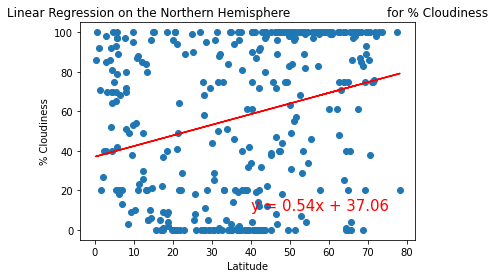

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [45]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.5382059054410678, intercept=37.05840308864522, rvalue=0.27530801245443814, pvalue=6.787032110505452e-08, stderr=0.0977041519556856, intercept_stderr=4.257712935070418)

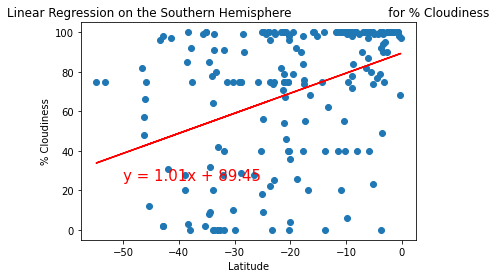

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,25))

In [47]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=1.0148466432065968, intercept=89.44642935030302, rvalue=0.3885796641321347, pvalue=3.022609896807197e-08, stderr=0.17550793901558312, intercept_stderr=4.1911101507514)

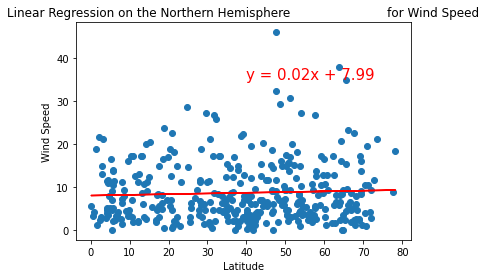

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [51]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.016198385369999665, intercept=7.991352870586745, rvalue=0.04728150079950212, pvalue=0.36315368885599897, stderr=0.01779072418179542, intercept_stderr=0.7752771500177021)

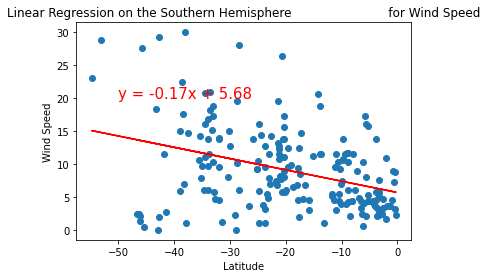

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))

In [54]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=-0.1713180331318617, intercept=5.683830372291254, rvalue=-0.36018140298236867, pvalue=3.319156326696265e-07, stderr=0.03236157988277029, intercept_stderr=0.7727909443970415)